In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
%matplotlib inline

In [31]:
df = pd.read_csv('train_E6oV3lV.csv')

In [32]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [33]:
X = df['tweet']
X.head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [34]:
Y = df['label']
Y.head()
Y_org = Y

In [35]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

# add padding
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=400)

In [36]:
X

array([[   0,    0,    0, ...,   95, 8136,  480],
       [   0,    0,    0, ..., 8137,    8, 8138],
       [   0,    0,    0, ...,   62,   26, 3422],
       ...,
       [   0,    0,    0, ...,   78,   11,  121],
       [   0,    0,    0, ..., 1650, 1651,  679],
       [   0,    0,    0, ...,    9,    6,  181]])

In [37]:
max(df['tweet'], key=len)

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 35)
pca.fit(X)
X = pca.transform(X);

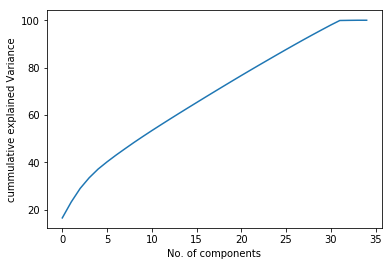

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [43]:
classifier = Sequential()
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu' ,input_dim =X.shape[1]))

In [44]:
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dense(2,kernel_initializer='uniform', activation='sigmoid'))

In [45]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [46]:
from sklearn.preprocessing import OneHotEncoder
y_e = OneHotEncoder()
Y_train_org = Y_train
Y_test_org = Y_test
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
y_e.fit(Y_train)
Y_train = y_e.transform(Y_train)
Y_test = y_e.transform(Y_test)

In [47]:
Y_train

<25569x2 sparse matrix of type '<class 'numpy.float64'>'
	with 25569 stored elements in Compressed Sparse Row format>

In [48]:
Y_test

<6393x2 sparse matrix of type '<class 'numpy.float64'>'
	with 6393 stored elements in Compressed Sparse Row format>

In [49]:
checker = classifier.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data = (X_test, Y_test))

Train on 25569 samples, validate on 6393 samples
Epoch 1/100
25569/25569 [==============================] - 2s 82us/step - loss: 0.2811 - acc: 0.9296 - val_loss: 0.2488 - val_acc: 0.9287
Epoch 2/100
25569/25569 [==============================] - 1s 56us/step - loss: 0.2436 - acc: 0.9301 - val_loss: 0.2473 - val_acc: 0.9287
Epoch 3/100
25569/25569 [==============================] - 1s 55us/step - loss: 0.2422 - acc: 0.9301 - val_loss: 0.2488 - val_acc: 0.9287
Epoch 4/100
25569/25569 [==============================] - 1s 57us/step - loss: 0.2417 - acc: 0.9301 - val_loss: 0.2501 - val_acc: 0.9287
Epoch 5/100
25569/25569 [==============================] - 2s 59us/step - loss: 0.2409 - acc: 0.9301 - val_loss: 0.2477 - val_acc: 0.9287
Epoch 6/100
25569/25569 [==============================] - 1s 55us/step - loss: 0.2406 - acc: 0.9301 - val_loss: 0.2470 - val_acc: 0.9287
Epoch 7/100
25569/25569 [==============================] - 1s 59us/step - loss: 0.2401 - acc: 0.9301 - val_loss: 0.2476 - v

25569/25569 [==============================] - 2s 88us/step - loss: 0.2206 - acc: 0.9344 - val_loss: 0.2489 - val_acc: 0.9226
Epoch 60/100
25569/25569 [==============================] - 2s 93us/step - loss: 0.2199 - acc: 0.9351 - val_loss: 0.2488 - val_acc: 0.9254
Epoch 61/100
25569/25569 [==============================] - 2s 96us/step - loss: 0.2195 - acc: 0.9349 - val_loss: 0.2505 - val_acc: 0.9246
Epoch 62/100
25569/25569 [==============================] - 2s 97us/step - loss: 0.2196 - acc: 0.9352 - val_loss: 0.2490 - val_acc: 0.9257
Epoch 63/100
25569/25569 [==============================] - 3s 99us/step - loss: 0.2194 - acc: 0.9354 - val_loss: 0.2486 - val_acc: 0.9253
Epoch 64/100
25569/25569 [==============================] - 2s 85us/step - loss: 0.2190 - acc: 0.9351 - val_loss: 0.2526 - val_acc: 0.9252
Epoch 65/100
25569/25569 [==============================] - 2s 84us/step - loss: 0.2191 - acc: 0.9349 - val_loss: 0.2486 - val_acc: 0.9255
Epoch 66/100
25569/25569 [==============

In [50]:
Y_pred_test_label = classifier.predict(X_test)
y_pred_test=np.argmax(Y_pred_test_label,axis =1)
y_pred_test
Y_pred_train_label = classifier.predict(X_train)
y_pred_train = np.argmax(Y_pred_train_label,axis=1)
Y_test_true = Y_test_org.astype(np.int)
Y_train_true = Y_train_org.astype(np.int)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_true,y_pred_test))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      5937
          1       0.37      0.10      0.16       456

avg / total       0.89      0.92      0.90      6393



In [52]:
print(classification_report(Y_train_true,y_pred_train))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97     23783
          1       0.76      0.21      0.33      1786

avg / total       0.93      0.94      0.92     25569



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
print("TRAIN:  \n",confusion_matrix(y_pred_train,Y_train_true))
print("\nTest:  \n",confusion_matrix(y_pred_test,Y_test_true))

TRAIN:  
 [[23663  1414]
 [  120   372]]

Test:  
 [[5860  411]
 [  77   45]]
